In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/jayden/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


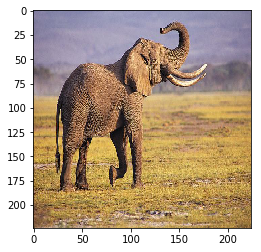

In [2]:
img_path = './data/elephant.jpg'

img = image.load_img(img_path, target_size=(224, 224))
# img = image.load_img(img_path)

plt.imshow(img)
plt.show()

In [3]:
# 包含全连接层
model=VGG16(include_top=True, weights='imagenet')
print(type(model))

<class 'keras.engine.training.Model'>


In [4]:
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

print(x.max())

scores = model.predict(x)

146.061


In [6]:
print(x.shape)

(1, 224, 224, 3)


In [8]:
# imagenet 标签文件
class_table = open('./data/synset_words.txt', 'r')
lines = class_table.readlines()
print("scores type: ", type(scores))
print("scores shape: ", scores.shape)
print(np.argmax(scores))
print('result is ', lines[np.argmax(scores)])
class_table.close()

scores type:  <class 'numpy.ndarray'>
scores shape:  (1, 1000)
386
result is  n02504458 African elephant, Loxodonta africana



In [9]:
del model

In [10]:
# 不含全连接层
model = VGG16(weights='imagenet',include_top=False)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)

In [11]:
print(features.shape)

(1, 7, 7, 512)


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [16]:
model_extractfeatures = Model(
    inputs=model.input, 
    outputs=model.get_layer('block5_pool').output)

block5_pool_features = model_extractfeatures.predict(x)

print(type(block5_pool_features ))
print(block5_pool_features.shape)

<class 'numpy.ndarray'>
(1, 7, 7, 512)


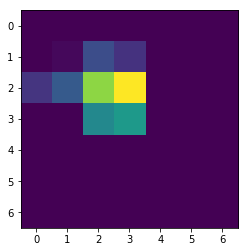

In [21]:
feature_image = block5_pool_features[:,:,:,23].reshape(7,7)
plt.imshow(feature_image)
plt.show()